# Plot K/E Block proteins

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
NUCKS_pos-pos v.s. NUCKS_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.635e-17 stat=0.000e+00
Using zero_method  wilcox
PolR1F_pos-pos v.s. PolR1F_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.616e-22 stat=1.000e+01
Using zero_method  wilcox
LYAR_pos-pos v.s. LYAR_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.792e-22 stat=3.930e+02
Using zero_method  wilcox
NUCKS_pos-neg v.s. NUCKS_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.635e-17 stat=0.000e+00
Using zero_method  wilcox
LYAR_pos-neg v.s. LYAR_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=4.203e-22 stat=4.150e+02
Using zero_method  wilcox
PolR1F_pos-neg v.s. PolR1F_pol-pol: Wilcoxon test (paired samp

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Using zero_method  wilcox
PolR1F_neg-neg v.s. PolR1F_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.839e-02 stat=3.183e+03
[[ 0.12623507 -0.25360346  3.75203524 -0.01526945  0.          0.
   0.          0.          1.56023646  7.07710971 -1.09837646  0.
   0.          0.          0.          6.43283529  5.79747167  0.
   0.          0.          0.          1.04100204  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]
[[1.04100204 5.79747167 6.43283529 0.12623507        nan        nan
         nan        nan        nan        nan        nan        nan]]
[[ 0.59105876 -0.47582531  4.16797495 -1.18013738  0.          0.
   0.          0.          0.85110843  7.63995088 -0.98397116  0.
   0.          0.          0.          6.12192847  6.43306837  0.
   0.          0.          0.         -0.80345012  0.          0.
   0.          0.          0.          0

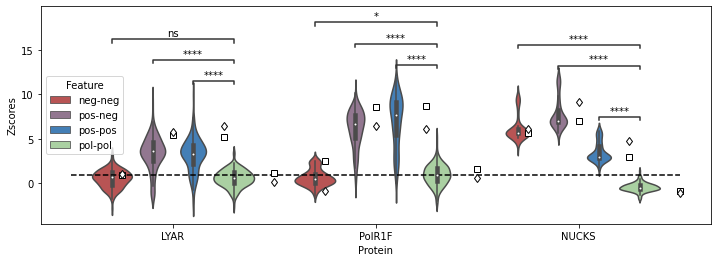

In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.colors import to_rgba
from statannot import add_stat_annotation

myproteins=['LYAR','PolR1F','NUCKS']
myfeatures=['neg-neg','pos-neg','pos-pos','pol-pol']
kingdomtype='Metazoa'
myspecies=['Homo sapiens']
#kingdomtype='Viridiplantae'

zscorelist=[]
featurenamelist=[]
proteinlist=[]
specieszscoremat=np.empty((len(myspecies),len(myproteins)*len(myfeatures),))
specieszscoremat[:] = np.nan
dfvplot=pd.DataFrame()
for p in range(0,len(myproteins)):
    df=pd.read_excel('../Bioinformatics_Data/evolution/'+myproteins[p]+'/eggnog_'+myproteins[p]+'_compositional_patterning_feature_zscores.xlsx')
    #print(df)
    df2=df.loc[df['Kingdoms'] == kingdomtype]
    #print(df2)
    
    for s in range(0,len(myspecies)):
        dfgrabspecies=df.loc[df['Species'] == myspecies[s]]
        for f in range(0,len(myfeatures)):
            specieszscoremat[s][(p)*(len(myfeatures))+f]=dfgrabspecies[myfeatures[f]]
    

    for f in range(0,len(myfeatures)):
        # List of zscores
        tmp=[item for item in df2[myfeatures[f]].tolist()]
        zscorelist=zscorelist+tmp
    
        # List of feature type
        tmplist=[myfeatures[f]]*(len(tmp))
        featurenamelist=featurenamelist+tmplist
    
        # List of domain type
        proteinlist=proteinlist+([myproteins[p]]*len(tmp))

dfvplot['Protein']=proteinlist
dfvplot['Zscores']=zscorelist
dfvplot['Feature']=featurenamelist

plt.figure(figsize=(12,4))
#ax=sbn.violinplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', palette=['#A32828','#7F517A','#134C87','#A5D89A'], inner='box')
ax=sbn.violinplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', palette=['#C94343','#967294','#3180C9','#A5D89A'], inner='box')
plt.plot([-0.5,len(myproteins)-0.5],[1,1],'k',linestyle='--')

add_stat_annotation(ax, data=dfvplot, x='Protein', y='Zscores', hue='Feature',
                    box_pairs=[((myproteins[0], 'neg-neg'), (myproteins[0], 'pol-pol')),
                                 ((myproteins[0], 'pos-neg'), (myproteins[0], 'pol-pol')),
                                 ((myproteins[0], 'pos-pos'), (myproteins[0], 'pol-pol')),
                               ((myproteins[1], 'neg-neg'), (myproteins[1], 'pol-pol')),
                                 ((myproteins[1], 'pos-neg'), (myproteins[1], 'pol-pol')),
                                 ((myproteins[1], 'pos-pos'), (myproteins[1], 'pol-pol')),
                               ((myproteins[2], 'neg-neg'), (myproteins[2], 'pol-pol')),
                                 ((myproteins[2], 'pos-neg'), (myproteins[2], 'pol-pol')),
                                 ((myproteins[2], 'pos-pos'), (myproteins[2], 'pol-pol'))
                                ],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# Plot human values
plt.plot([-0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5],specieszscoremat[0],'s',color='white',markeredgecolor='black')

# Load in frog values to plot
mypattfeats_all=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly']
frogzscoremat=np.empty((1,len(myproteins)*len(myfeatures),))
frogzscoremat[:] = np.nan
for p in range(0,len(myproteins)):
    tmpzvec=np.load('../Bioinformatics_Data/evolution/xenopus_sequences_analysis/'+ myproteins[p]+'_frog.npy')
    print(tmpzvec)
    for f in range(0,len(myfeatures)):
            frogzscoremat[s][(p)*(len(myfeatures))+f]=tmpzvec[0][mypattfeats_all.index(myfeatures[f])]
    print(frogzscoremat)
plt.plot([-0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5],frogzscoremat[0],'d',color='white',markeredgecolor='black')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Evolution_patterning_K_E_block_proteins.pdf', transparent=True, bbox_inches = "tight")

print(specieszscoremat)

#for violin in ax.collections:
#    violin.set_alpha(0.25)

#for artist in ax.lines:
#    artist.set_zorder(10)
#for artist in ax.findobj(PathCollection):
#    artist.set_zorder(11)

#sbn.stripplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', alpha=1, palette=['#A32828','#7F517A','#134C87','#A5D89A'], jitter=True, dodge=True, ax=ax)
#sbn.stripplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', alpha=1, palette=['grey','grey','grey','grey'], jitter=True, dodge=True, ax=ax, size=1)
#sbn.swarmplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', palette=['#A32828','#7F517A','#134C87','#A5D89A'],dodge=True)
#sbn.boxplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', palette=['#A32828','#7F517A','#134C87','#A5D89A'],showfliers = True)
#plt.plot([-1,len(myproteins)+1],[1,1],'-k'

# Plot D/E-block proteins

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
UBTF_pos-pos v.s. UBTF_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.770e-18 stat=1.430e+02
Using zero_method  wilcox
NCL_pos-pos v.s. NCL_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=8.476e-19 stat=1.400e+02
Using zero_method  wilcox
NCL_pos-neg v.s. NCL_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.074e-19 stat=5.700e+01
Using zero_method  wilcox
UBTF_pos-neg v.s. UBTF_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.201e-04 stat=1.701e+03
Using zero_method  wilcox
NCL_neg-neg v.s. NCL_pol-pol: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.452e-19 stat=6.900e+01
Using zero_method  wilcox
UBTF_neg-neg v.s. UBTF_pol-pol: Wilcoxon test (paired samples) with Bonferro

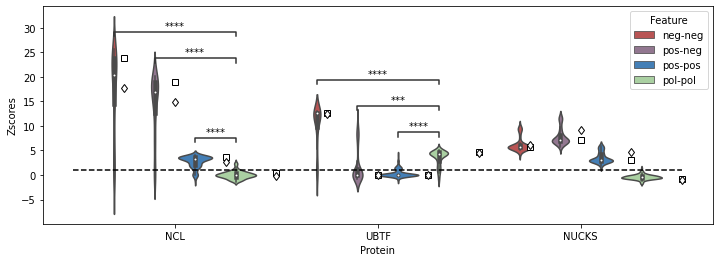

In [3]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.colors import to_rgba
from statannot import add_stat_annotation

myproteins=['NCL','UBTF','NUCKS']
myfeatures=['neg-neg','pos-neg','pos-pos','pol-pol']
kingdomtype='Metazoa'
myspecies=['Homo sapiens']
#kingdomtype='Viridiplantae'

zscorelist=[]
featurenamelist=[]
proteinlist=[]
specieszscoremat=np.empty((len(myspecies),len(myproteins)*len(myfeatures),))
specieszscoremat[:] = np.nan
dfvplot=pd.DataFrame()
for p in range(0,len(myproteins)):
    df=pd.read_excel('../Bioinformatics_Data/evolution/'+myproteins[p]+'/eggnog_'+myproteins[p]+'_compositional_patterning_feature_zscores.xlsx')
    #print(df)
    df2=df.loc[df['Kingdoms'] == kingdomtype]
    #print(df2)

    for s in range(0,len(myspecies)):
        dfgrabspecies=df.loc[df['Species'] == myspecies[s]]
        for f in range(0,len(myfeatures)):
            specieszscoremat[s][(p)*(len(myfeatures))+f]=dfgrabspecies[myfeatures[f]]

    for f in range(0,len(myfeatures)):
        # List of zscores
        tmp=[item for item in df2[myfeatures[f]].tolist()]
        zscorelist=zscorelist+tmp
    
        # List of feature type
        tmplist=[myfeatures[f]]*(len(tmp))
        featurenamelist=featurenamelist+tmplist
    
        # List of domain type
        proteinlist=proteinlist+([myproteins[p]]*len(tmp))

dfvplot['Protein']=proteinlist
dfvplot['Zscores']=zscorelist
dfvplot['Feature']=featurenamelist

plt.figure(figsize=(12,4))
#ax=sbn.violinplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', palette=['#A32828','#7F517A','#134C87','#A5D89A'], inner='box')
ax=sbn.violinplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', palette=['#C94343','#967294','#3180C9','#A5D89A'], inner='box')
plt.plot([-0.5,len(myproteins)-0.5],[1,1],'k',linestyle='--')

add_stat_annotation(ax, data=dfvplot, x='Protein', y='Zscores', hue='Feature',
                    box_pairs=[((myproteins[0], 'neg-neg'), (myproteins[0], 'pol-pol')),
                                 ((myproteins[0], 'pos-neg'), (myproteins[0], 'pol-pol')),
                                 ((myproteins[0], 'pos-pos'), (myproteins[0], 'pol-pol')),
                               ((myproteins[1], 'neg-neg'), (myproteins[1], 'pol-pol')),
                                 ((myproteins[1], 'pos-neg'), (myproteins[1], 'pol-pol')),
                                 ((myproteins[1], 'pos-pos'), (myproteins[1], 'pol-pol'))
                                ],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# Plot human values
plt.plot([-0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5],specieszscoremat[0],'s',color='white',markeredgecolor='black')

# Load in frog values to plot
mypattfeats_all=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly']
frogzscoremat=np.empty((1,len(myproteins)*len(myfeatures),))
frogzscoremat[:] = np.nan
for p in range(0,len(myproteins)):
    tmpzvec=np.load('../Bioinformatics_Data/evolution/xenopus_sequences_analysis/'+ myproteins[p]+'_frog.npy')
    print(tmpzvec)
    for f in range(0,len(myfeatures)):
            frogzscoremat[s][(p)*(len(myfeatures))+f]=tmpzvec[0][mypattfeats_all.index(myfeatures[f])]
    print(frogzscoremat)
plt.plot([-0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5],frogzscoremat[0],'d',color='white',markeredgecolor='black')


plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Evolution_patterning_D_E_tract_proteins.pdf', transparent=True, bbox_inches = "tight")

print(specieszscoremat)

#for violin in ax.collections:
#    violin.set_alpha(0.25)

#for artist in ax.lines:
#    artist.set_zorder(10)
#for artist in ax.findobj(PathCollection):
#    artist.set_zorder(11)

#sbn.stripplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', alpha=1, palette=['#A32828','#7F517A','#134C87','#A5D89A'], jitter=True, dodge=True, ax=ax)
#sbn.stripplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', alpha=1, palette=['grey','grey','grey','grey'], jitter=True, dodge=True, ax=ax, size=1)
#sbn.swarmplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', palette=['#A32828','#7F517A','#134C87','#A5D89A'],dodge=True)
#sbn.boxplot(y='Zscores', x='Protein', data=dfvplot, hue='Feature', palette=['#A32828','#7F517A','#134C87','#A5D89A'],showfliers = True)
#plt.plot([-1,len(myproteins)+1],[1,1],'-k'

## Plot 5 top proteins across evolution small sample

[[ 9.78033206e-01  5.45480150e+00  5.20385714e+00  1.17787497e+00
   2.47587573e+00  8.57392146e+00  8.69101713e+00  1.61010334e+00
   5.62334493e+00  7.03766416e+00  2.98877139e+00 -8.31451791e-01
   2.38006161e+01  1.89856568e+01  3.69417839e+00  3.13589632e-01
   1.26648705e+01  0.00000000e+00  0.00000000e+00  4.58475636e+00]
 [ 9.32652618e-01  4.17438244e+00  3.83451283e+00  1.07260719e+00
  -8.48211803e-02  7.63369355e+00  9.34845262e+00  9.17166913e-01
   5.59500650e+00  7.15679503e+00  3.34441691e+00 -3.12384258e-01
   2.29270592e+01  1.84836826e+01  3.53099842e+00 -1.60342837e-01
   1.26648705e+01  0.00000000e+00  0.00000000e+00  4.58475636e+00]
 [-6.60675745e-01  4.34525370e+00  4.07437946e+00  1.60418113e+00
   5.04673640e-01  6.75076822e+00  9.09563948e+00  1.05718937e+00
   5.61298970e+00  7.01787084e+00  2.98238966e+00 -4.48255567e-01
   2.53694557e+01  1.97434944e+01  4.03295783e+00  6.65258348e-01
   1.26648705e+01  0.00000000e+00  0.00000000e+00  4.32036882e+00]
 [ 1.21

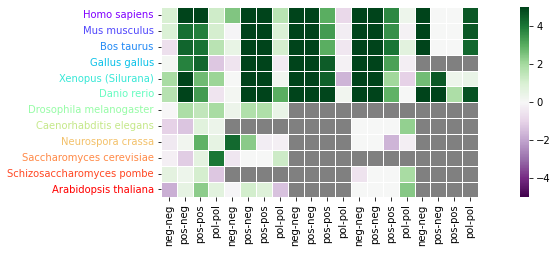

In [5]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

myproteins=['LYAR','PolR1F','NUCKS','NCL','UBTF']
#myfeatures=['neg-neg','pos-neg','pos-pos','pol-pol','K Patch','D Patch','E Patch']
myfeatures=['neg-neg','pos-neg','pos-pos','pol-pol']

myspecies=['Homo sapiens','Mus musculus','Bos taurus','Gallus gallus','Xenopus (Silurana)','Danio rerio','Drosophila melanogaster','Caenorhabditis elegans','Neurospora crassa','Saccharomyces cerevisiae','Schizosaccharomyces pombe','Arabidopsis thaliana']

matforheatmap=np.empty((len(myspecies),len(myproteins)*len(myfeatures),))
matforheatmap[:] = np.nan

for p in range(0,len(myproteins)):
    df=pd.read_excel('../Bioinformatics_Data/evolution/'+myproteins[p]+'/eggnog_'+myproteins[p]+'_compositional_patterning_feature_zscores.xlsx')
    specieslist=df['Species'].tolist()
    for f in range(0,len(myfeatures)):
        currfeatlist=df[myfeatures[f]].tolist()
        for s in range(0,len(myspecies)):
            if myspecies[s] in specieslist:
                myidx=specieslist.index(myspecies[s])
                matforheatmap[s][(p)*(len(myfeatures))+f]=currfeatlist[myidx]

plt.figure(figsize=(15,3.5))
ax = plt.subplot(111)
heat_map = sbn.heatmap(matforheatmap, linewidth = 1 , annot = False, cmap='PRGn',vmin=-5,vmax=5, square=True)
heat_map.set_yticklabels(myspecies)
plt.yticks(rotation=0) 
heat_map.set_xticklabels(myfeatures*len(myproteins))
plt.xticks(rotation=90) 
heat_map.set_facecolor("grey")
print(matforheatmap)  

cmap = plt.cm.get_cmap('rainbow', len(myspecies))
cmaplist=[]
for i in range(0,len(myspecies)):
    cmaplist.append(list(cmap(i)))
for ytick, color in zip(ax.get_yticklabels(), cmaplist):
    print(color)
    ytick.set_color(color)

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Summary_Figures/charge_patterning_evolution_summary.pdf', transparent=False, bbox_inches = "tight")


## Plot top 5 proteins across evolution by kingdom

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


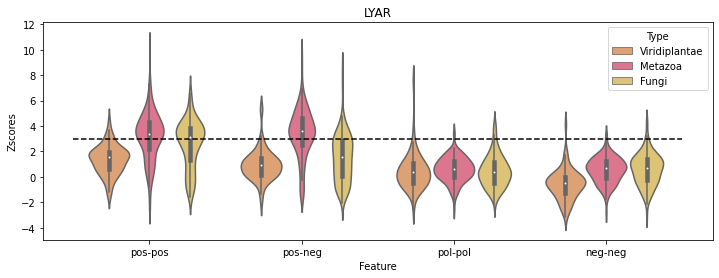

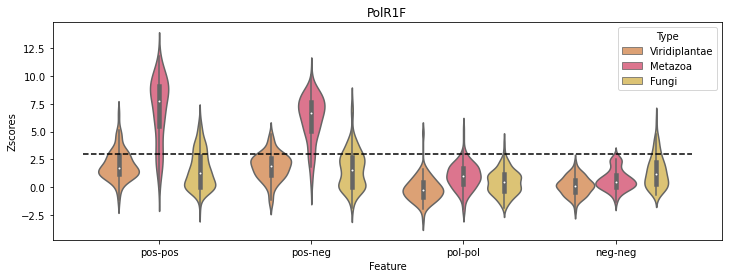

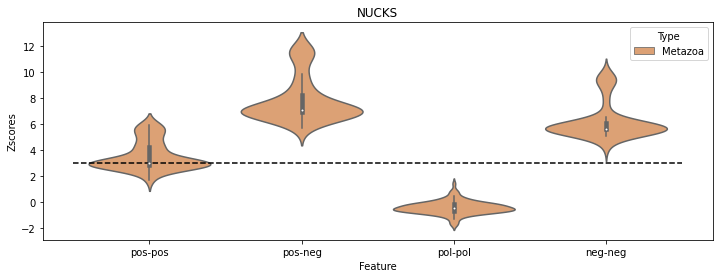

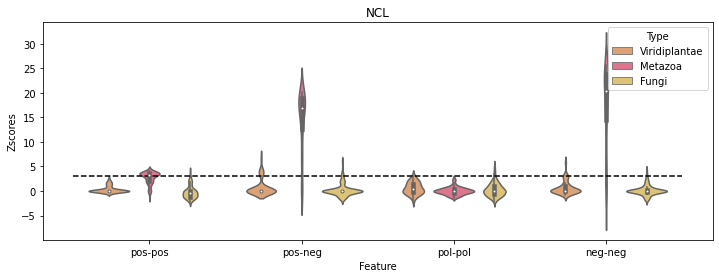

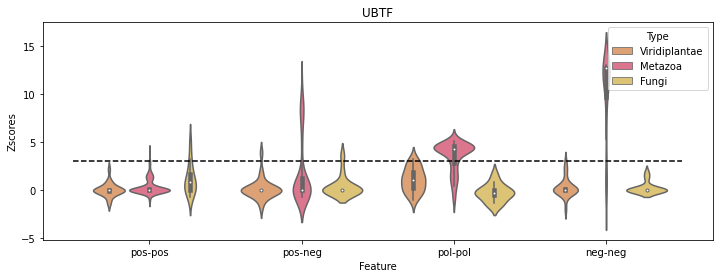

In [6]:

myproteins=['LYAR','PolR1F','NUCKS','NCL','UBTF']
myfeatures=['neg-neg','pos-neg','pos-pos','pol-pol']
#myfeatures=['K Patch','D Patch','E Patch']

for p in range(0,len(myproteins)):
    zscorelist=[]
    featurenamelist=[]
    seqtypelist=[]
    df=pd.read_excel('../Bioinformatics_Data/evolution/'+myproteins[p]+'/eggnog_'+myproteins[p]+'_compositional_patterning_feature_zscores.xlsx')
    specieslist=df['Species'].tolist()
    kingdomlist=df['Kingdoms'].tolist()
    
    for f in range(0,len(myfeatures)):
        currfeatlist=df[myfeatures[f]].tolist()
        zscorelist=zscorelist+currfeatlist
        
        # List of feature type
        tmplist=[myfeatures[f]]*(len(currfeatlist))
        featurenamelist=featurenamelist+tmplist
    
        # List of domain type
        seqtypelist=seqtypelist+kingdomlist

    dfzvec=pd.DataFrame()
    dfzvec['Type']=seqtypelist
    dfzvec['Zscores']=zscorelist
    dfzvec['Feature']=featurenamelist

    dfzvec = dfzvec.sort_values(by=['Feature','Type'], ascending=False)
    #print(dfzvec)
    
    
    plt.figure(figsize=(12,4))
    ax=sbn.violinplot(y='Zscores', x='Feature', data=dfzvec, hue='Type', palette=['#ED9F64','#ED6485','#EDCC64','#FFFFFF'], inner='box')
    plt.plot([-0.5,len(myfeatures)-0.5],[3,3],'k',linestyle='--')
    plt.title(myproteins[p])
    #plt.savefig('Summary_Figures/violinplot_'+myproteins[p]+'_charge_patterning_evolution_summary.pdf', transparent=False, bbox_inches = "tight")



## Fraction of species by Kingdom with that feature

[[0.01324503 0.67549669 0.65562914 0.01324503 0.         0.89473684
  0.84962406 0.03759398 1.         1.         0.46078431 0.
  0.86440678 0.88983051 0.57627119 0.         0.83928571 0.21428571
  0.01785714 0.73214286]
 [0.02649007 0.21854305 0.52980132 0.0397351  0.14864865 0.18918919
  0.2027027  0.01351351        nan        nan        nan        nan
  0.02484472 0.04347826 0.01242236 0.03726708 0.         0.07692308
  0.15384615 0.        ]
 [0.01369863 0.04109589 0.08219178 0.02739726 0.         0.11267606
  0.18309859 0.01408451        nan        nan        nan        nan
  0.02083333 0.14583333 0.         0.02083333 0.         0.04166667
  0.         0.04166667]]


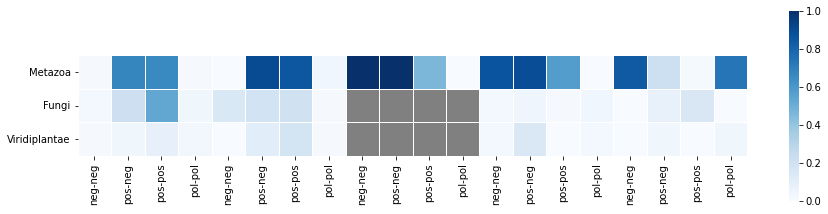

In [7]:
myproteins=['LYAR','PolR1F','NUCKS','NCL','UBTF']
myfeatures=['neg-neg','pos-neg','pos-pos','pol-pol']
mykingdoms=['Metazoa','Fungi','Viridiplantae']
#myfeatures=['K Patch','D Patch','E Patch']
cutoffval=3

enrichedmat=np.zeros((len(mykingdoms),len(myproteins)*len(myfeatures)))
enrichedmat[:] = np.nan

for p in range(0,len(myproteins)):
    zscorelist=[]
    featurenamelist=[]
    #seqtypelist=[]
    df=pd.read_excel('../Bioinformatics_Data/evolution/'+myproteins[p]+'/eggnog_'+myproteins[p]+'_compositional_patterning_feature_zscores.xlsx')
    specieslist=df['Species'].tolist()
    kingdomlist=df['Kingdoms'].tolist()
    
    for k in range(0,len(mykingdoms)):
        df2=df.loc[df['Kingdoms'] == mykingdoms[k]]
    
        for f in range(0,len(myfeatures)):
            currfeatlist=df2[myfeatures[f]].tolist()
            countfeat = len([i for i in currfeatlist if i >= cutoffval])
            if len(currfeatlist)>0:
                #print(len(myproteins)*(f)+p)
                enrichedmat[k,len(myfeatures)*(p)+f]=countfeat/len(currfeatlist)

print(enrichedmat)

plt.figure(figsize=(15,3.5))
eheat_map = sbn.heatmap(enrichedmat, linewidth = 1 , annot = False, cmap='Blues',vmin=0,vmax=1, square=True)
eheat_map.set_yticklabels(mykingdoms)
plt.yticks(rotation=0) 
eheat_map.set_xticklabels(myfeatures*len(myproteins))
plt.xticks(rotation=90) 
eheat_map.set_facecolor("grey")

#plt.savefig('Summary_Figures/fraction_charge_patterning_evolution_gte_'+str(cutoffval)+'.pdf', transparent=False, bbox_inches = "tight")
#plt.savefig('Summary_Figures/fraction_charge_patterning_evolution_gte_'+str(cutoffval)+'_w_NOP7_UTP23.pdf', transparent=False, bbox_inches = "tight")
